<a href="https://colab.research.google.com/github/KarolKucinski2001/Machine-Learning/blob/main/ML_Zad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wstępna obróbka danych


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Wczytanie danych
data_csv = pd.read_csv('stroke.csv', sep=';')
data_csv.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Przygotowanie danych do pracy

In [ ]:
# Usunięcie wierszy z brakującymi danymi w kolumnie bmi
data_csv = data_csv.dropna(subset=['bmi'])
# Zamiana Yes na 1 oraz No na 0 w kolumnie ever_married
data_csv['ever_married'] = data_csv['ever_married'].map({'Yes': 1, 'No': 0})
# Zastosowanie dummy encoding dla zmiennych kategorycznych
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
data_csv = pd.get_dummies(data_csv, columns=categorical_columns)
data_csv.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,1,186.21,29.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
print(data_csv['stroke'].value_counts())

0    4699
1     209
Name: stroke, dtype: int64


Jak widzimy w naszych danych mamy jedynie 209 przypadków osób chorych, natomiast aż 4699 przypadków osób zdrowych. Może to spowodować błędne oszacowanie modelu, gdyż model nauczy się, że prawie zawsze pacjent jest chory. Aby uniknąć takiego przypadku można zastosować kilka metod, podstawowe z nich to undersampling i oversampling, można też zastosować bardziej zaawansowane metody jak na przykład SMOTE (Synthetic Minority Over-sampling Technique). W naszym przypadku użyjemy właśnie tej ostatniej techniki ponieważ w przypadku klasyfikacji groźnej choroby istone jest aby unikać utraty informacji, która może być kluczowa dla wykrywania rzadkich, ale ważnych przypadków. SMOTE generuje syntetyczne próbki klasy o mniejszej liczności, zachowując jednocześnie cechy i charakterystyki klasy większościowej. Oznacza to, że nie tracimy oryginalnych danych i nie ma ryzyka utraty ważnych informacji.

In [ ]:
X_tmp = data_csv.drop(['stroke'], axis=1)
y_tmp = data_csv['stroke']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tmp, y_tmp)
data_balanced = pd.concat([X_resampled, y_resampled], axis=1)
print(data_balanced['stroke'].value_counts() )
X_resampled.head()

1    4699
0    4699
Name: stroke, dtype: int64


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,0,1,0,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,1,105.92,32.5,0,1,0,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,1,171.23,34.4,1,0,0,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,1,174.12,24.0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,1,186.21,29.0,0,1,0,0,1,0,0,0,1,0,1,0,0


Podział na zbiór treningowy i testowy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)



Standaryzacja i normalizacja danych

In [ ]:
standardScaler = StandardScaler()
X_train_standarized = standardScaler.fit_transform(X_train)
X_test_standarized = standardScaler.transform(X_test)

minMaxScaler = MinMaxScaler(feature_range=(0,1))
X_train_normalized = minMaxScaler.fit_transform(X_train)
X_test_normalized = minMaxScaler.fit_transform(X_test)

# Zadanie 2 KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

data = {
    'age': [50],
    'hypertension': [0],
    'heart_disease': [0],
    'ever_married': [1],
    'avg_glucose_level': [100],
    'bmi': [30.6],
    'gender_Female': [0],
    'gender_Male': [1],
    'work_type_Govt_job': [0],
    'work_type_Never_worked': [0],
    'work_type_Private': [1],
    'work_type_Self-employed': [0],
    'work_type_children': [0],
    'Residence_type_Rural': [0],
    'Residence_type_Urban': [1],
    'smoking_status_Unknown': [0],
    'smoking_status_formerly smoked': [0],
    'smoking_status_never smoked': [0],
    'smoking_status_smokes': [1]
}
df1 = pd.DataFrame(data)

single_y_pred = knn.predict(df1)
print(single_y_pred)

[1]


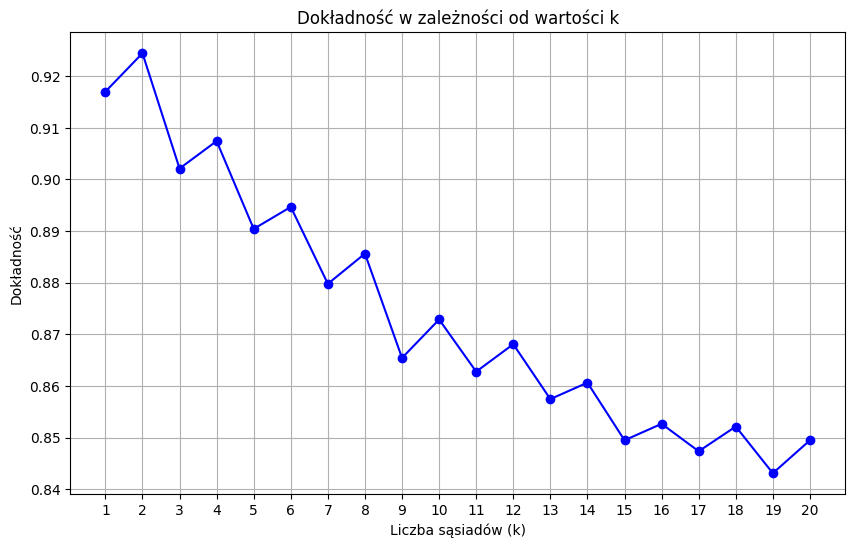

k=1, Dokładność: 0.9170212765957447
k=2, Dokładność: 0.924468085106383
k=3, Dokładność: 0.902127659574468
k=4, Dokładność: 0.9074468085106383
k=5, Dokładność: 0.8904255319148936
k=6, Dokładność: 0.8946808510638298
k=7, Dokładność: 0.8797872340425532
k=8, Dokładność: 0.8856382978723404
k=9, Dokładność: 0.8654255319148936
k=10, Dokładność: 0.872872340425532
k=11, Dokładność: 0.8627659574468085
k=12, Dokładność: 0.8680851063829788
k=13, Dokładność: 0.8574468085106383
k=14, Dokładność: 0.8606382978723405
k=15, Dokładność: 0.8494680851063829
k=16, Dokładność: 0.8526595744680852
k=17, Dokładność: 0.8473404255319149
k=18, Dokładność: 0.8521276595744681
k=19, Dokładność: 0.8430851063829787
k=20, Dokładność: 0.8494680851063829


In [ ]:

# Przygotowanie pustych list do przechowywania wyników
k_values = []
accuracy_values = []

# Przeprowadzenie symulacji dla różnych wartości k
for k in range(1, 21):  # Testujemy k od 1 do 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    k_values.append(k)
    accuracy_values.append(accuracy)

    # Wykres wyników
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Dokładność w zależności od wartości k')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Wyświetlenie wyników
for k, accuracy in zip(k_values, accuracy_values):
    print(f'k={k}, Dokładność: {accuracy}')

Porównanie algorytmu knn na danych bez standaryzacji i z standaryzacją

In [ ]:

# Standaryzacja danych
standardScaler = StandardScaler()
X_train_standarized = standardScaler.fit_transform(X_train)
X_test_standarized = standardScaler.transform(X_test)

# Inicjacja modelu KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Możesz dostosować liczbę sąsiadów (k) według potrzeb

# Trenowanie modelu na danych ze standaryzacją
knn.fit(X_train_standarized, y_train)

# Przewidywanie na danych ze standaryzacją
y_pred_standarized = knn.predict(X_test_standarized)

# Obliczenie dokładności modelu ze standaryzacją
accuracy_standarized = accuracy_score(y_test, y_pred_standarized)

# Trenowanie modelu na danych bez standaryzacji
knn.fit(X_train, y_train)

# Przewidywanie na danych bez standaryzacji
y_pred = knn.predict(X_test)

# Obliczenie dokładności modelu bez standaryzacji
accuracy = accuracy_score(y_test, y_pred)

# Porównanie wyników
print("Dokładność modelu ze standaryzacją: {:.2f}%".format(accuracy_standarized * 100))
print("Dokładność modelu bez standaryzacji: {:.2f}%".format(accuracy * 100))


Dokładność modelu ze standaryzacją: 96.49%
Dokładność modelu bez standaryzacji: 89.04%


Wpływ wielkości zbioru danych

In [ ]:
sample_sizes = [100, 500, 1000, 2000, 4000]

for sample_size in sample_sizes:
    # Wybierz podzbiór danych o określonym rozmiarze
    data_subset = data_csv.sample(n=sample_size, random_state=1)

    # Przygotuj dane (jak w Twoim poprzednim kodzie)

    # Standaryzacja danych
    standardScaler = StandardScaler()
    X_train_standarized = standardScaler.fit_transform(X_train)
    X_test_standarized = standardScaler.transform(X_test)

    # Podział danych na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

    # Inicjacja modelu KNN
    knn = KNeighborsClassifier(n_neighbors=2)

    # Trenowanie modelu
    knn.fit(X_train_standarized, y_train)

    # Przewidywanie
    y_pred = knn.predict(X_test_standarized)

    # Obliczenie dokładności modelu
    accuracy = accuracy_score(y_test, y_pred)

    print("Rozmiar zbioru danych:", sample_size)
    print("Dokładność modelu KNN ze standaryzacją:", accuracy)
    print()

Rozmiar zbioru danych: 100
Dokładność modelu KNN ze standaryzacją: 0.9680851063829787

Rozmiar zbioru danych: 500
Dokładność modelu KNN ze standaryzacją: 0.9680851063829787

Rozmiar zbioru danych: 1000
Dokładność modelu KNN ze standaryzacją: 0.9680851063829787

Rozmiar zbioru danych: 2000
Dokładność modelu KNN ze standaryzacją: 0.9680851063829787

Rozmiar zbioru danych: 4000
Dokładność modelu KNN ze standaryzacją: 0.9680851063829787



# Zadanie 3 KKNN

Inicjalizacja i trening modelu KKNN

In [ ]:
k = 5  # Liczba sąsiadów
kknn = KNeighborsClassifier(n_neighbors=k)
kknn.fit(X_train_standarized, y_train)
# Predykcja na zbiorze testowym
y_pred_KKNN = kknn.predict(X_test_standarized)

Macierz błędu oraz miary dla modelu

Z uwagi na problem medyczny będziemy kierowali się dokładnością oraz czułością


Informacje o czułości, specyficzności i dokładności

In [ ]:
print(confusion_matrix(y_test, y_pred_KKNN))

[[906  24]
 [ 42 908]]


In [ ]:

accuracy = accuracy_score(y_test, y_pred_KKNN)
conf_matrix = confusion_matrix(y_test, y_pred_KKNN)
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Wyświetlenie informacji o czułości, specyficzności i dokładności
metrics_df = pd.DataFrame({
    'Dokładność': [accuracy],
    'Specyficzność': [specificity],
    'Czułość': [sensitivity],
})

print(metrics_df)


   Dokładność  Specyficzność   Czułość
0    0.964894       0.974194  0.955789


Ewaluacja dla różnych wielkości zbioru danych i stworzenie wykresu


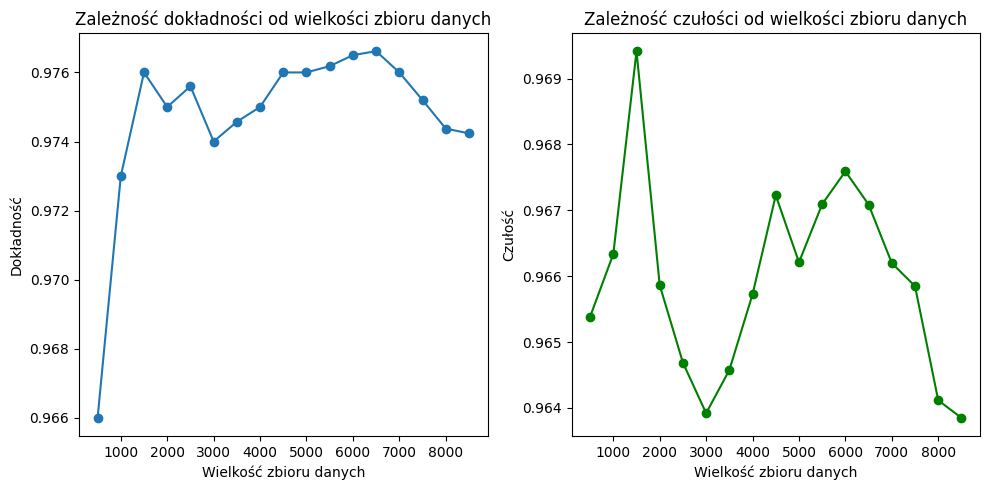

In [ ]:
sample_sizes = list(range(500, 9000, 500))
accuracies = []
sensitivities = []

for sample_size in sample_sizes:
    X_sample, _, y_sample, _ = train_test_split(X_resampled, y_resampled, train_size=sample_size, random_state=10)
    X_sample = standardScaler.transform(X_sample)
    y_sample_pred = kknn.predict(X_sample)
    accuracy_sample = accuracy_score(y_sample, y_sample_pred)
    sensitivity_sample = confusion_matrix(y_sample, y_sample_pred)[1, 1] / (confusion_matrix(y_sample, y_sample_pred)[1, 1] + confusion_matrix(y_sample, y_sample_pred)[1, 0])
    accuracies.append(accuracy_sample)
    sensitivities.append(sensitivity_sample)

    # Wykres zależności dokładności i czułości od wielkości zbioru danych
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, accuracies, marker='o')
plt.title('Zależność dokładności od wielkości zbioru danych')
plt.xlabel('Wielkość zbioru danych')
plt.ylabel('Dokładność')

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, sensitivities, marker='o', color='green')
plt.title('Zależność czułości od wielkości zbioru danych')
plt.xlabel('Wielkość zbioru danych')
plt.ylabel('Czułość')

plt.tight_layout()
plt.show()

# Zadanie 4 Regresja logistyczna

In [ ]:
#zmienne po standaryzacji
logregS = LogisticRegression()
logregS.fit(X_train_standarized , y_train)
y_pred_LR_standarized = logregS.predict(X_test_standarized)
conf_matrix_of_standarized = confusion_matrix(y_test, y_pred_LR_standarized)
tn, fp, fn, tp = conf_matrix_of_standarized.ravel()

accuracy_standarized = (tp + tn) / (tp + tn + fp + fn)
sensitivity_standarized = tp / (tp + fn)

#zmienne przed standaryzacja
logregD = LogisticRegression()
logregD.fit(X_train , y_train)
y_pred_LR = logregD.predict(X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred_LR)
tn1, fp1, fn1, tp1 = conf_matrix1.ravel()

accuracy = (tp1 + tn1) / (tp1 + tn1 + fp1 + fn1)
sensitivityStandarized = tp1 / (tp1 + fn1)
print("Zmienne przed standaryzacja:\n")
print(conf_matrix1)
print("Dokładność wynosi "+str(accuracy))
print("Zmienne po standaryzacji:\n")
print(conf_matrix_of_standarized)
print("Dokładność wynosi "+str(accuracy_standarized))

Zmienne przed standaryzacja:

[[920  10]
 [ 70 880]]
Dokładność wynosi 0.9574468085106383
Zmienne po standaryzacji:

[[920  10]
 [ 70 880]]
Dokładność wynosi 0.9574468085106383


Wersja ze standaryzacją ale bez outlierów

In [ ]:
# Usuwanie outlierów
def remove_outliers_zscore(data, columns_to_check, threshold=3):
    for column in columns_to_check:
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        outliers = (z_scores > threshold) | (z_scores < -threshold)
        data = data[~outliers]
    return data

# Wybór kolumn do analizy
columns_to_check = ['age', 'avg_glucose_level', 'bmi']

# Usuwanie outlierów
data_balanced_no_outliers = remove_outliers_zscore(data_balanced.copy(), columns_to_check)

# Podział danych na zbiór treningowy i testowy
data_balanced_no_outliers_train = data_balanced_no_outliers.sample(frac=0.8, random_state=42)
data_balanced_no_outliers_test = data_balanced_no_outliers.drop(data_balanced_no_outliers_train.index)

# Przygotowanie danych
X_train_no_outliers = data_balanced_no_outliers_train.drop('stroke', axis=1)
y_train_no_outliers = data_balanced_no_outliers_train['stroke']

X_test_no_outliers = data_balanced_no_outliers_test.drop('stroke', axis=1)
y_test_no_outliers = data_balanced_no_outliers_test['stroke']

# Standaryzacja danych
scaler = StandardScaler()
X_train_normalizedRL = scaler.fit_transform(X_train_no_outliers)
X_test_normalizedRL= scaler.transform(X_test_no_outliers)

# Inicjalizacja modelu regresji logistycznej
logreg = LogisticRegression()

# Trenowanie modelu
logreg.fit(X_train_normalizedRL, y_train_no_outliers)

# Predykcja na zbiorze testowym
y_pred_LR = logreg.predict(X_test_normalizedRL)

# Obliczenie macierzy błędu
conf_matrixRL2 = confusion_matrix(y_test_no_outliers, y_pred_LR)
tnRL2, fpRL2, fnRL2, tpRL2 = conf_matrixRL2.ravel()
print(conf_matrixRL2)
# Obliczenie accuracy i sensitivity
accuracyRL2 = (tpRL2 + tnRL2) / (tpRL2 + tnRL2 + fpRL2 + fnRL2)
sensitivityRL2 = tpRL2 / (tpRL2 + fnRL2)

# Wyświetlenie wyników
print(f'Dokładność: {accuracyRL2}')
print(f'Czułość: {sensitivityRL2}')
print(f'Czułość zmiennych z wartościami odstającymi: {sensitivityStandarized}')

[[938   4]
 [ 80 838]]
Dokładność: 0.9548387096774194
Czułość: 0.9128540305010894
Czułość zmiennych z wartościami odstającymi: 0.9357894736842105


#Zadanie 5 Krzywa ROC i wartość AUC

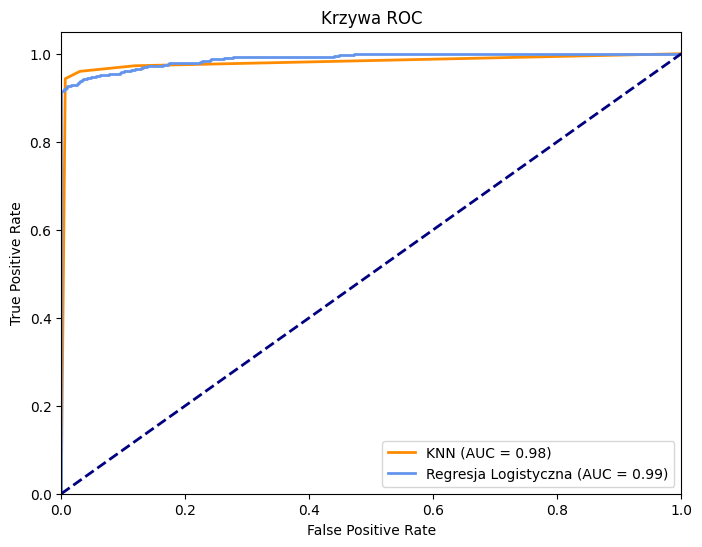

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicjacja modelu KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Inicjacja modelu regresji logistycznej
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Obliczenie wartości prawdopodobieństwa przewidywanych klas
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Obliczenie krzywych ROC i wartości AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Wykres krzywych ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_logreg, tpr_logreg, color='cornflowerblue', lw=2, label='Regresja Logistyczna (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.show()
